In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt

'''Plot a histogram with multiple bars
    x_data: x-axis data, e.g., [4k, 8k, 16k, ...]
    y_data: y-axis data, e.g., {'WT-V': [140, 263, 453, 657, 871, 955, 974, 1005], ...}
    x_label: x-axis label, e.g., 'Block Size (KB)'
    y_label: y-axis label, e.g., 'Throughput (MB/s)'
    fig_name: figure name
    baseline: baseline configuration, e.g., 'WT-V'
'''
def multi_bar_hist(x_data, y_data, x_label, y_label, fig_name, baseline):
    fs = 20
    dp_num = len(x_data)
    cfg_num = len(y_data.keys())
    cfg_list = list(y_data.keys())

    speedup = {}
    for cfg in cfg_list:
        speedup[cfg] = [y_data[cfg][i] / y_data[baseline][i] for i in range(dp_num)]
    
    x_loc = np.arange(dp_num)
    width = 1.0 / (1 + cfg_num)

    plt.figure()
    fig, ax = plt.subplots()
    rects = list()
    for i in range(cfg_num):
        center = x_loc + (i - (cfg_num - 1) / 2.0) * width
        rects.append(ax.bar(center, speedup[cfg_list[i]], width, label=cfg_list[i]))
        ax.bar_label(rects[i], labels=y_data[cfg_list[i]], label_type='center', padding=3, rotation='vertical', fmt='%d', fontsize=fs-10)


    plt.ylim([0, 2.0])
    plt.yticks(fontsize=fs)
    ax.set_ylabel(y_label, fontsize=fs)
    ax.set_xlabel(x_label, fontsize=fs)
    ax.set_xticks(x_loc, x_data, fontsize=fs)
    ax.legend(loc='upper right', fontsize=fs-5)

    fig.tight_layout()
    plt.savefig(fig_name)
    plt.show()
    plt.close()


<Figure size 640x480 with 0 Axes>

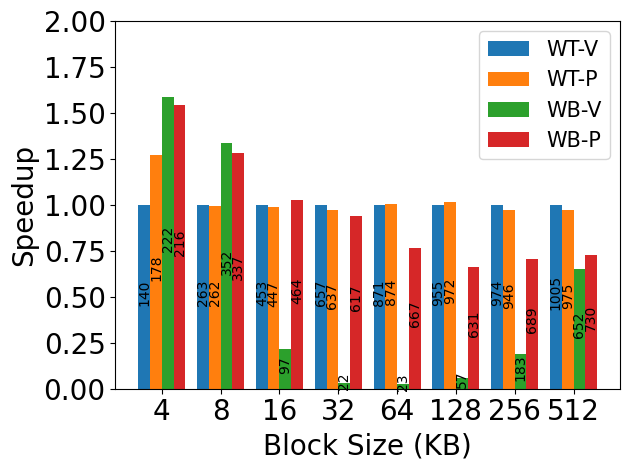

In [21]:
tps = {}
tps['WT-V'] = [140, 263, 453, 657, 871, 955, 974, 1005]
tps['WT-P'] = [178, 262, 447, 637, 874, 972, 946, 975]
tps['WB-V'] = [222, 352, 97, 22, 23, 57, 183, 652]
tps['WB-P'] = [216, 337, 464, 617, 667, 631, 689, 730]

bs = [4, 8, 16, 32, 64, 128, 256, 512]

multi_bar_hist(bs, tps, 'Block Size (KB)', 'Speedup', 'fig1.pdf', 'WT-V')